# Exploration graphique des données Hi-C

## Chargement des modules Python

In [1]:
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py

In [2]:
import cooler

In [3]:
# The following directive activates inline plotting
%matplotlib inline

## Chargement des données

In [4]:
filepath = "/home/bureau/projects/def-bureau/distiller/results_iPSC/coolers_library_group/Neuron_libraries.hg38.mapq_30.2048.cool"

In [5]:
c = cooler.Cooler(filepath)

In [6]:
%whos

Variable   Type      Data/Info
------------------------------
c          Cooler    <Cooler "Neuron_libraries<...>38.mapq_30.2048.cool::/">
cooler     module    <module 'cooler' from '/h<...>ages/cooler/__init__.py'>
filepath   str       /home/bureau/projects/def<...>es.hg38.mapq_30.2048.cool
h5py       module    <module 'h5py' from '/hom<...>ckages/h5py/__init__.py'>
np         module    <module 'numpy' from '/cv<...>kages/numpy/__init__.py'>
op         module    <module 'posixpath' from <...>/python3.8/posixpath.py'>
pandas     module    <module 'pandas' from '/c<...>ages/pandas/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


### Dictionnaire des infos

In [7]:
c.info

{'bin-size': 2048,
 'bin-type': 'fixed',
 'creation-date': '2021-01-11T12:47:55.248732',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.10',
 'genome-assembly': 'hg38',
 'metadata': {},
 'nbins': 1567257,
 'nchroms': 455,
 'nnz': 121193108,
 'storage-mode': 'symmetric-upper',
 'sum': 148203568}

### Examen des données

In [8]:
c.chroms()[:5]

,name,length
0,chr1,248956422
1,chr2,242193529
2,chr3,198295559
3,chr4,190214555
4,chr5,181538259


In [10]:
c.chromsizes[:24]

name
chr1     248956422
chr2     242193529
chr3     198295559
chr4     190214555
chr5     181538259
chr6     170805979
chr7     159345973
chrX     156040895
chr8     145138636
chr9     138394717
chr11    135086622
chr10    133797422
chr12    133275309
chr13    114364328
chr14    107043718
chr15    101991189
chr16     90338345
chr17     83257441
chr18     80373285
chr20     64444167
chr19     58617616
chrY      57227415
chr22     50818468
chr21     46709983
Name: length, dtype: int32

In [11]:
c.bins()[:10]

,chrom,start,end
0,chr1,0,2048
1,chr1,2048,4096
2,chr1,4096,6144
3,chr1,6144,8192
4,chr1,8192,10240
5,chr1,10240,12288
6,chr1,12288,14336
7,chr1,14336,16384
8,chr1,16384,18432
9,chr1,18432,20480


Use the `join=True` option if you would like to expand the bin IDs into genomic bin coordinates by joining the output with the bin table.

In [13]:
c.pixels(join=True)[:10]

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr1,51200,53248,chr3,55420928,55422976,1
1,chr1,53248,55296,chr15,92790784,92792832,1
2,chr1,57344,59392,chr15,23451648,23453696,1
3,chr1,57344,59392,chr16,6389760,6391808,1
4,chr1,61440,63488,chr4,65851392,65853440,1
5,chr1,61440,63488,chr11,123011072,123013120,1
6,chr1,61440,63488,chr15,101699584,101701632,1
7,chr1,69632,71680,chr12,128792576,128794624,1
8,chr1,114688,116736,chr1,151052288,151054336,1
9,chr1,114688,116736,chr5,176048128,176050176,1


In [14]:
arr = c.matrix(balance=False)[1000:1200, 1000:1200]
arr

array([[22,  1,  1, ...,  0,  0,  0],
       [ 1, 10,  4, ...,  0,  0,  0],
       [ 1,  4, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 14,  5,  3],
       [ 0,  0,  0, ...,  5,  7,  5],
       [ 0,  0,  0, ...,  3,  5, 16]], dtype=int32)

## Visualisation d'une sous-matrice

<ipython-input-15-6067e96817f5>:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(arr), cmap='YlOrRd')


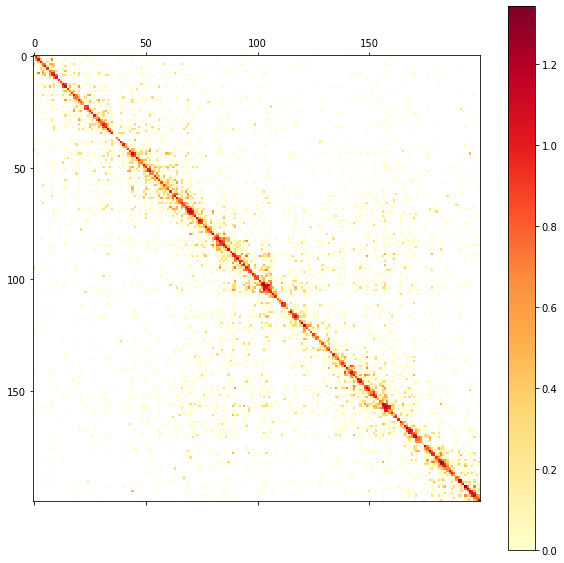

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)